In [1]:
import numpy as np
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

from rich import print

In [2]:
plt.style.use("seaborn-v0_8")

In [3]:
data_schema = {
    "CustomerID": pl.Int32,
    "Age": pl.Int32,
    "Gender": pl.String,
    "Tenure": pl.Int32,
    "Usage Frequency": pl.Int32,
    "Support Calls": pl.Int32,
    "Payment Delay": pl.Int32,
    "Subscription Type": pl.String,
    "Contract Length": pl.String,
    "Total Spend": pl.Float32,
    "Last Interaction": pl.Int32,
    "Churn": pl.Int32,
}

In [4]:
train_df = pl.scan_csv("../data/train.csv", schema=data_schema)
test_df = pl.scan_csv("../data/test.csv", schema=data_schema)

In [5]:
full_df = pl.concat([train_df, test_df])  # NOTE: this is for analysis only

In [6]:
full_df.head().collect()

CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
i32,i32,str,i32,i32,i32,i32,str,str,f32,i32,i32
2,30,"""Female""",39,14,5,18,"""Standard""","""Annual""",932.0,17,1
3,65,"""Female""",49,1,10,8,"""Basic""","""Monthly""",557.0,6,1
4,55,"""Female""",14,4,6,18,"""Basic""","""Quarterly""",185.0,3,1
5,58,"""Male""",38,21,7,7,"""Standard""","""Monthly""",396.0,29,1
6,23,"""Male""",32,20,5,8,"""Basic""","""Monthly""",617.0,20,1


In [7]:
print("Dataset Shape:", full_df.collect().shape)

Dataset Shape:
(505207, 12)

In [26]:
full_df.drop(
    pl.col(["Gender", "Contract Length", "Subscription Type", "CustomerID", "Churn"])
).describe()

statistic,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction
str,f64,f64,f64,f64,f64,f64,f64
"""count""",505206.0,505206.0,505206.0,505206.0,505206.0,505206.0,505206.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",39.704172,31.350435,15.714825,3.833317,13.496843,620.072754,14.610581
"""std""",12.670577,17.237482,8.619323,3.133603,8.451187,245.31926,8.608286
"""min""",18.0,1.0,1.0,0.0,0.0,100.0,1.0
"""25%""",29.0,16.0,8.0,1.0,6.0,446.0,7.0
"""50%""",40.0,32.0,16.0,3.0,13.0,648.900024,14.0
"""75%""",49.0,46.0,23.0,6.0,20.0,824.0,22.0
"""max""",65.0,60.0,30.0,10.0,30.0,1000.0,30.0


In [9]:
full_df.null_count().collect()

CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
1,1,1,1,1,1,1,1,1,1,1,1


In [10]:
full_df = full_df.drop_nulls()

In [11]:
full_df.null_count().collect()

CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
churn_distribution = full_df.group_by("Churn").agg(
    pl.count("Churn").alias("count"),
    (pl.count("Churn") / len(full_df.collect()) * 100).alias("percentage"),
)

In [27]:
churn_distribution.collect()

Churn,count,percentage
i32,u32,f64
0,224714,44.479678
1,280492,55.520322


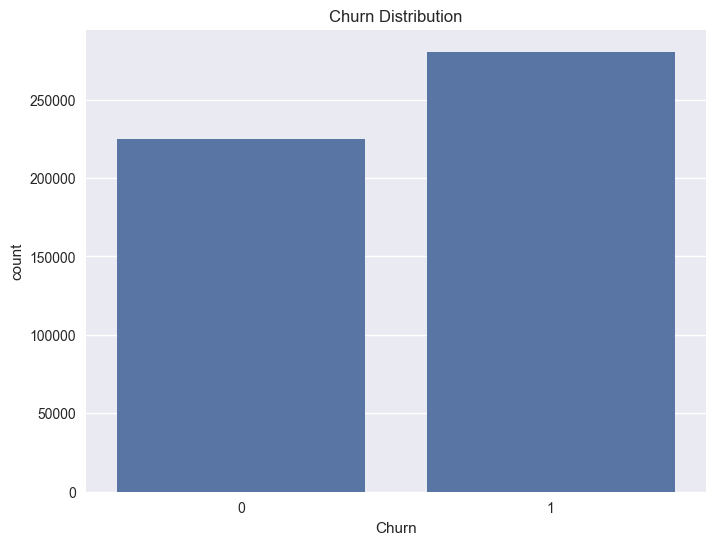

In [14]:
plt.figure(figsize=(8, 6))
sns.barplot(data=churn_distribution.collect(), x="Churn", y="count")
plt.title("Churn Distribution")
plt.show()

In [18]:
categorical_cols = ["Gender", "Subscription Type", "Contract Length"]

numerical_cols = [
    "Age",
    "Tenure",
    "Usage Frequency",
    "Support Calls",
    "Payment Delay",
    "Total Spend",
    "Last Interaction",
    "Churn",
]

print("\nCategorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

print("\nUnique values in categorical columns:")
for col in categorical_cols:
    unique_values = full_df.select(pl.col(col)).unique().collect()
    print(f"\n{col}:", unique_values)

Categorical Columns:
['Gender', 'Subscription Type', 'Contract Length']

Numerical Columns:
['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction', 'Churn']

Unique values in categorical columns:

Gender: shape: (2, 1)
┌────────┐
│ Gender │
│ ---    │
│ str    │
╞════════╡
│ Female │
│ Male   │
└────────┘

Subscription Type: shape: (3, 1)
┌───────────────────┐
│ Subscription Type │
│ ---               │
│ str               │
╞═══════════════════╡
│ Basic             │
│ Premium           │
│ Standard          │
└───────────────────┘

Contract Length: shape: (3, 1)
┌─────────────────┐
│ Contract Length │
│ ---             │
│ str             │
╞═════════════════╡
│ Quarterly       │
│ Annual          │
│ Monthly         │
└─────────────────┘

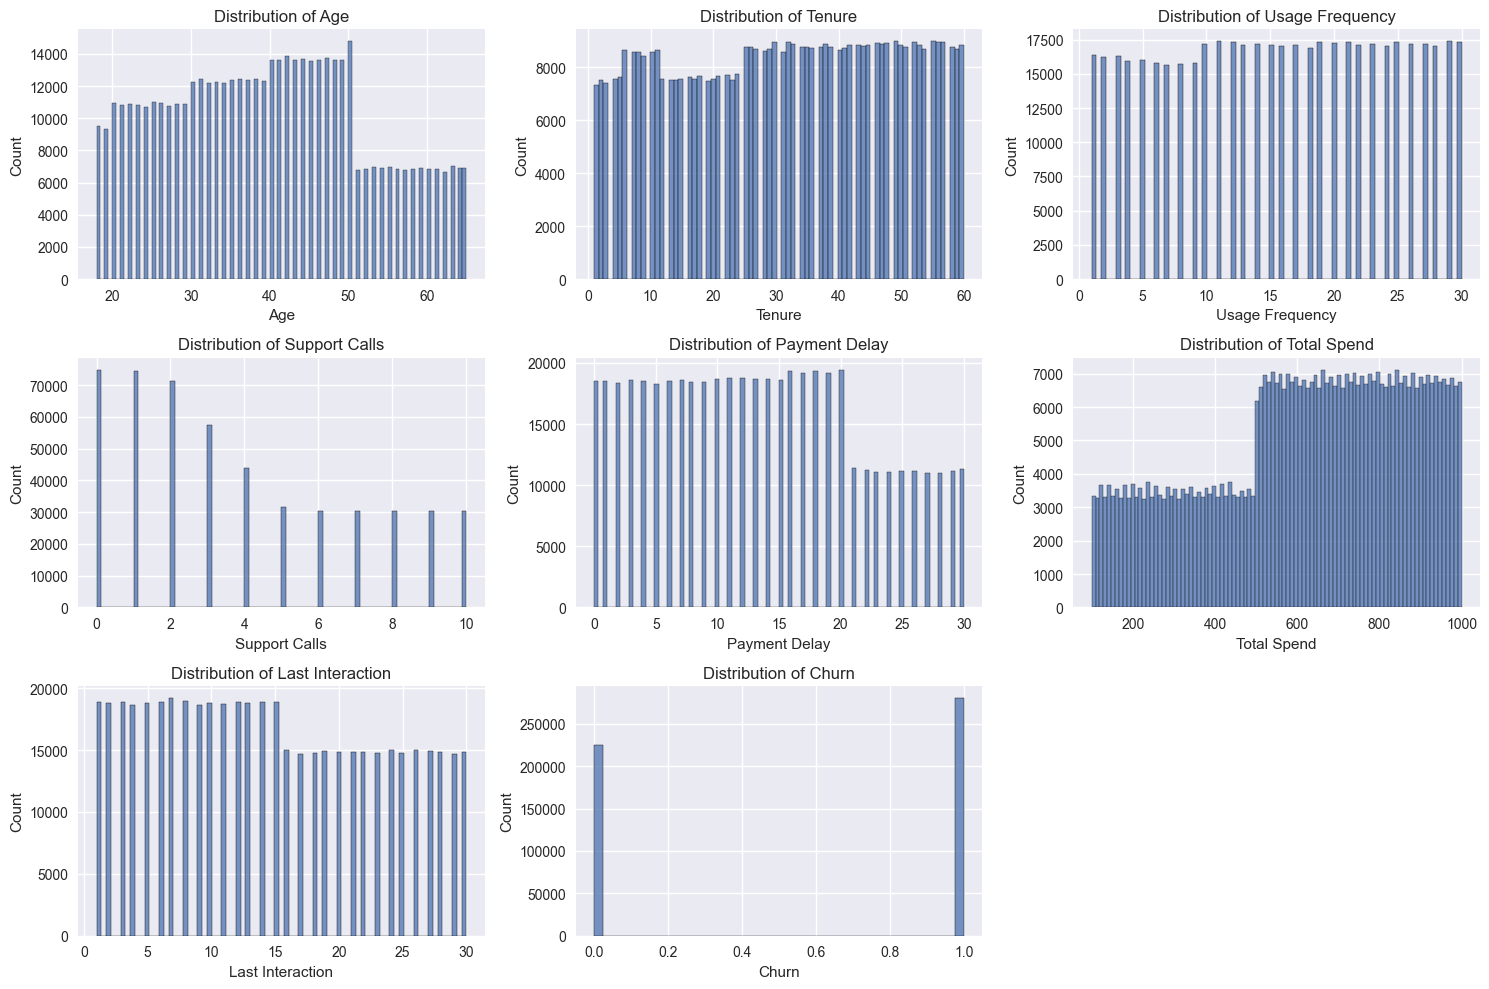

In [32]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=full_df.collect(), x=col)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

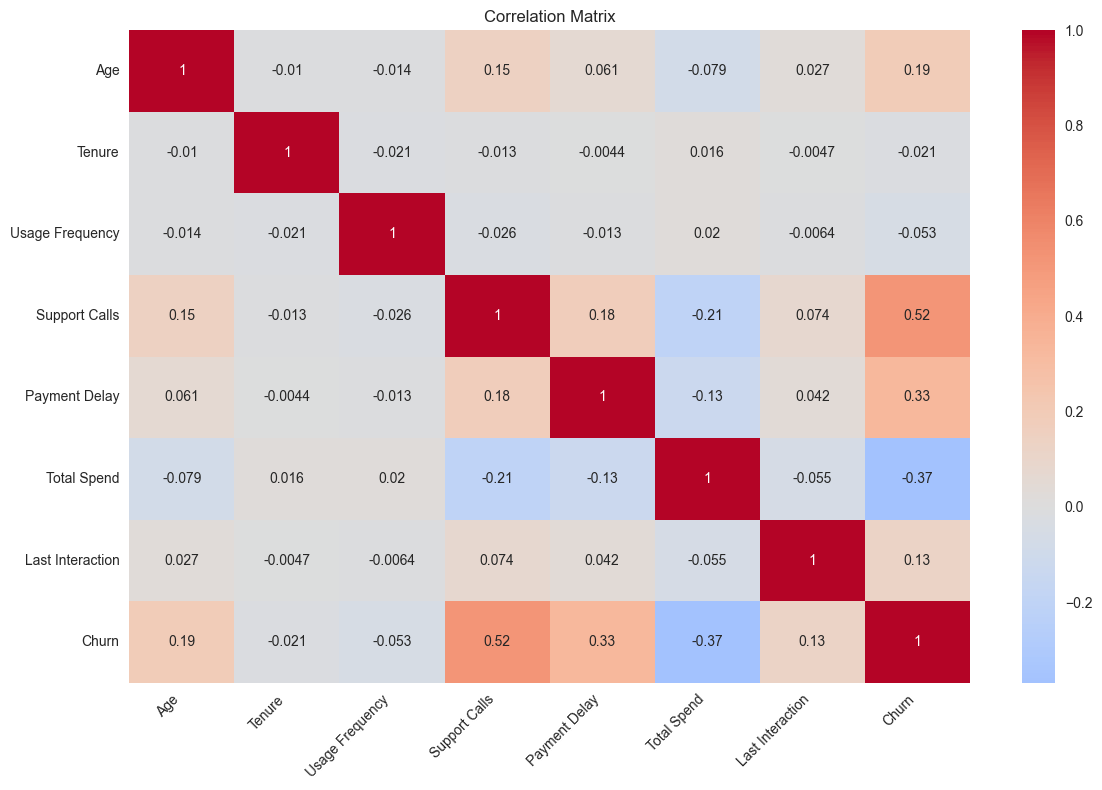

In [17]:
numerical_cols.remove("CustomerID")
numerical_df = full_df.select(numerical_cols).collect()
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    center=0,
    xticklabels=numerical_cols,
    yticklabels=numerical_cols,
)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

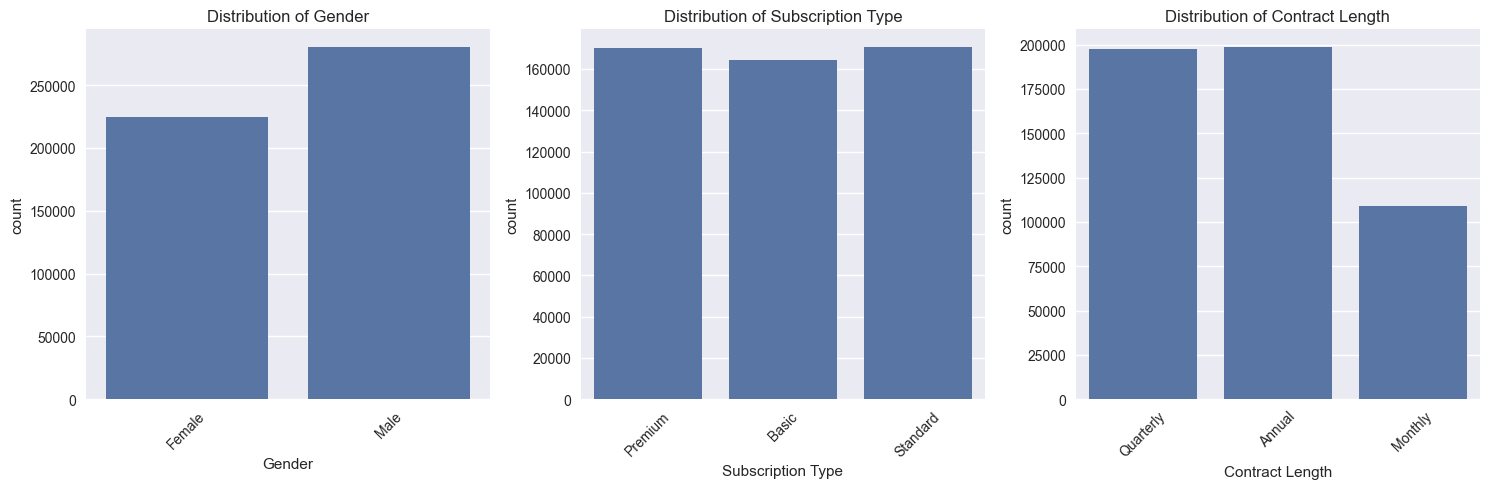

In [38]:
plt.figure(figsize=(15, 5))

for idx, col in enumerate(categorical_cols, 1):
    plt.subplot(1, 3, idx)
    dist_data = full_df.group_by(col).agg(pl.len().alias("count")).collect()
    sns.barplot(data=dist_data, x=col, y="count")
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

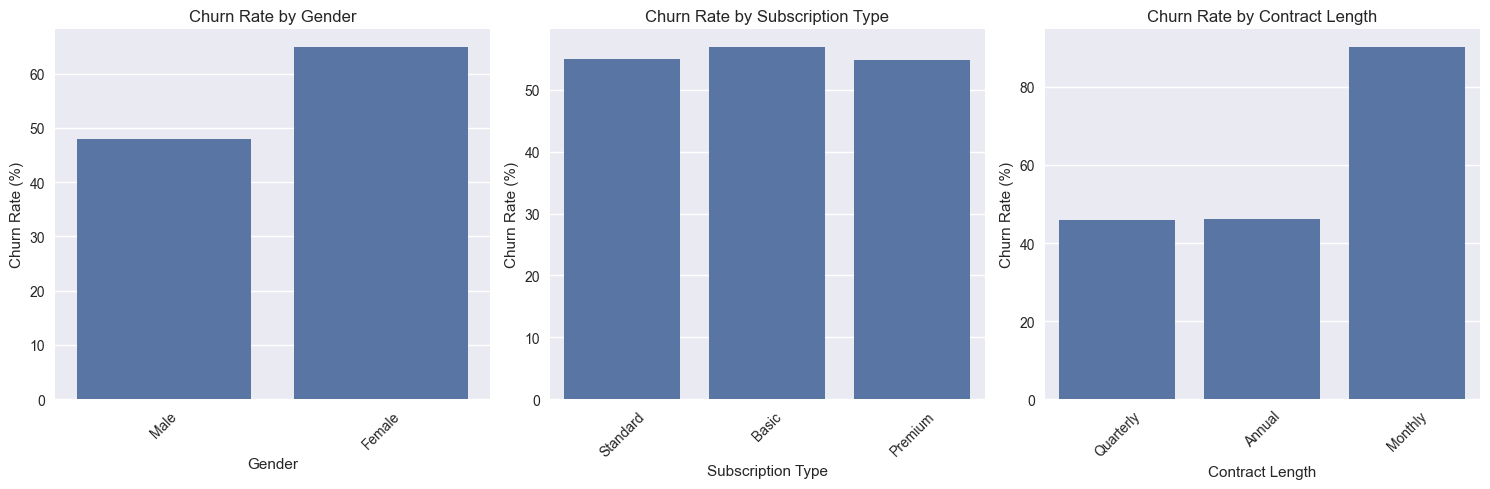

In [40]:
plt.figure(figsize=(15, 5))

for idx, col in enumerate(categorical_cols, 1):
    plt.subplot(1, 3, idx)
    churn_by_cat = (
        full_df.group_by(col)
        .agg((pl.mean("Churn") * 100).alias("churn_rate"))
        .collect()
    )
    sns.barplot(data=churn_by_cat, x=col, y="churn_rate")
    plt.xticks(rotation=45)
    plt.title(f"Churn Rate by {col}")
    plt.ylabel("Churn Rate (%)")

plt.tight_layout()
plt.show()